# 2. 자연어와 단어의 분산 표현

In [1]:
from IPython.display import Image

# 2.1 자연어 처리
- 인간의 언어를 컴퓨터에게 이해시키기 위한 기술 분야
- 컴퓨터에게 단어의 의미를 이해시키는 것이 중요
- 세가지 기법 : 시소러스를 활용한 기법, 통계 기반 기법,  추론 기반 기법

# 2.2 시소러스
- 유의어(동의어, 유의어) 사전
- 사람을 쓰는 비용이 많이 큼
- 단어의 미묘한 차이 표현 불가능

# 2.3 통계 기반 기법
- 말뭉치 사용

# ※ 말뭉치 전처리

In [2]:
# 예시1

text='You say goodbye and I say hello.'
text=text.lower()
text=text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [3]:
# 띄어쓰기로 단어 분류

words=text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
# 단어 ID와 단어를 dictionary로 생성

word_to_id={}  # 단어에서 ID로의 변환
id_to_word={} # ID에서 단어로의 변환

for i in words:
    print(i)
    if i not in word_to_id: # i가 word_to_id에 포함되지 않았다면 
        new_id=len(word_to_id) # new_id = word_to_id 안의 단어 개수 id가 0,1,2,...식으로 증가
        word_to_id[i]=new_id # word_to_id의 word에 new_id 추가
        print('word_to_id: ',word_to_id)
        id_to_word[new_id]=i # id_to_word의 new_id에 단어 i 추가
        print('id_to_word: ',id_to_word)

you
word_to_id:  {'you': 0}
id_to_word:  {0: 'you'}
say
word_to_id:  {'you': 0, 'say': 1}
id_to_word:  {0: 'you', 1: 'say'}
goodbye
word_to_id:  {'you': 0, 'say': 1, 'goodbye': 2}
id_to_word:  {0: 'you', 1: 'say', 2: 'goodbye'}
and
word_to_id:  {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3}
id_to_word:  {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and'}
i
word_to_id:  {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4}
id_to_word:  {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i'}
say
hello
word_to_id:  {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5}
id_to_word:  {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello'}
.
word_to_id:  {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
id_to_word:  {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [5]:
# 확인

print(word_to_id)
print(id_to_word)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [6]:
# 패키지 import

import numpy as np

In [7]:
# 단어 목록을 단어 목록 id로 변경

corpus=[word_to_id[i] for i in words] # words에 해당하는 word_to_id의 values 값 추출 
print(corpus) 
corpus=np.array(corpus) # 추출한 values 값을 array로 변환
corpus

[0, 1, 2, 3, 4, 1, 5, 6]


array([0, 1, 2, 3, 4, 1, 5, 6])

In [8]:
# 위의 과정을 함수로 구현

def preprocess(text):
    import numpy as np
    
    # 문장 전처리
    text=text.lower()
    text=text.replace('.',' .')
    words=text.split(' ')
    
    # 단어 목록 생성
    word_to_id={}
    id_to_word={}
    
    for i in words:
        if i not in word_to_id:
            new_id=len(word_to_id)
            word_to_id[i]=new_id
            id_to_word[new_id]=i
            
    # array 배열로 변환
    corpus=np.array([word_to_id[i] for i in words])
    
    return corpus, word_to_id, id_to_word

In [9]:
# 함수 확인

preprocess('You say goodbye and I say Hello.')

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

# ※ 분포가설
- 통계기반 기법
- 특정단어 주변의 단어가 몇 개인지 집계

# ※ 동시발생 행렬
- 모든 단어에 대해 동시 발생하는 단어를 표로 나타 낼수 있는데 이표가 행렬의 형태를 띔

In [10]:
# 필요 패키지 import

import sys
sys.path.append('..')
import numpy as np
import common.util as ut

In [11]:
# 함수가 제대로 import 되었는지 확인

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)

print(word_to_id)
print(id_to_word)
print(corpus)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
[0 1 2 3 4 1 5 6]


In [12]:
# 동시발생 행렬

C=np.array([[0,1,0,0,0,0,0],
            [1,0,1,0,1,1,0],
            [0,1,0,1,0,0,0],
            [0,0,1,0,1,0,0],
            [0,1,0,1,0,0,0],
            [0,1,0,0,0,0,1],
            [0,0,0,0,0,1,0]], dtype=np.int32)
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [13]:
print(C[0]) # ID가 0인 단어의 벡터 표현
print(C[4]) # ID가 4인 단어의 벡터 표현
print(C[word_to_id['goodbye']]) # goodbye의 벡터 표현

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [14]:
# 동시발생 행렬를 함수로 생성

def create_co_matrix(corpus, vocap_size, window_size=1):
    import numpy as np
    
    corpus_size=len(corpus)
    co_matrix=np.zeros((vocap_size,vocap_size),dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx=idx-i  # idx의 왼쪽 요소 인덱스값
            right_idx=idx+i # idx의 오른쪽 요소 인덱스값
            
            if left_idx>=0: # 만약 left_idx가 0보다 크거나 같다면
                left_word_id=corpus[left_idx]
                co_matrix[word_id,left_word_id]+=1
            
            if right_idx < corpus_size: # 만약 right_idx가 corpus_size보다 작다면
                right_word_id=corpus[right_idx] 
                co_matrix[word_id,right_word_id]+=1
                
    return co_matrix

In [15]:
# 확인

create_co_matrix(corpus,len(word_to_id))

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

# ※ 벡터간 유사도
- 벡터의 유사도를 측정하는 방법은 벡터의 내적, 유클리드거리 등이 있으나 단어 벡터의 유사도를 나타낼 때는 코사인 유사도를 주로 이용함                         
- 코사인 유사도 : 두벡터가 가리키는 방향이 얼마나 비슷한가를 나타내는 유사도, 완전히 같은 방향이라면 1, 정반대 방향이라면 -1

In [16]:
# 코사인 유사도 함수 생성
# 이 함수는 제로벡터가 들어오면 분모가 0이 되는 오류가 생긴다 
# 따라서 아주 작은값인 eps(epsilon)을 더해주면 된다 

def cos_similarity(x,y,eps=1e-8):
    import numpy as np
    
    nx=x/(np.sqrt(np.sum(x**2))+eps) # x의 정규화
    ny=y/(np.sqrt(np.sum(y**2))+eps) # y의 정규화

    return np.dot(nx,ny) # nx와 ny의 내적

In [17]:
# 필요 패키지 import

import sys
sys.path.append('..')
import common.util as ut

In [18]:
# 단어 벡터 유사도 구하기

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)
vocab_size=len(word_to_id) # 어휘수
C=ut.create_co_matrix(corpus,vocab_size)

c0=C[word_to_id['you']] # you의 단어 벡터
print(c0)
c1=C[word_to_id['i']]  # i의 단어 벡터
print(c1)

print(ut.cos_similarity(c0,c1))

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
0.7071067691154799


In [19]:
# 위의 유사도 함수를 활용하여 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수 구현

def most_similar(query,word_to_id,id_to_word,word_matrix,top=5):
# (검색어,단어에서 단어ID로의 딕셔너리,단어ID에서 단어로의 딕셔너리,단어벡터를 모은 행렬,상위몇개까지 출력할지)

    # 검색어 확인
    if query not in word_to_id: # 검색어가 단어ID에서 단어로의 딕셔너리에 없다면
        return '%s을(를) 찾을 수 없습니다.'% query
    
    print('\n[query]'+query)
    query_id=word_to_id[query]
    query_vec=word_matrix[query_id]
    
    # 코사인 유사도 계산
    vocab_size=len(id_to_word)
    similarity=np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i]=ut.cos_similarity(word_matrix[i],query_vec)
    
    # 코사인 유사도를 기준으로 내림차순 출력
    count=0
    ''' 
    argsort 요소의 인덱스를 오름차순으로 정리한다
    argsort는 오름차순으로 정렬하기 때문에 -1을 곱하여 내림차순으로 정렬한 것이다
    
    '''
    for i in (-1*similarity).argsort(): 
        if id_to_word[i]==query:
            continue
        print('%s: %s' % (id_to_word[i],similarity[i]))
        
        count+=1
        if count>=top:
            return 
    

In [20]:
# 비슷한 단어 순위 출력하는 함수 확인

most_similar('you',word_to_id,id_to_word,C,top=5)


[query]you
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799
say: 0.0
and: 0.0


# 2.4. 통계기반 기법 개선

# ※ 상호정보량
- 점별 상호정보량(PMI) : PMI(x,y)=log2(P(x,y)/P(x)P(y))                       
- P(x) : x가 일어날 확률, P(y) : y가 일어날 확률, P(x,y) : x와 y가 동시에 일어날 확률                                                                       
- PMI가 높을수록 관련성이 높음                                                 
- 동시발생 횟수가 0이면 log2 = -∞가 됨                                       
- 실제로 구현 할 때는 양의 상호정보량(PPMI) 사용                              
- PPMI(x,y)=max(0,PMI(x,y))

In [21]:
# 필요 패키지 import

import sys
sys.path.append(' .. ')
import numpy as np
import common.util as ut
import matplotlib.pyplot as plt

In [22]:
# 양의 상호정보량 함수 생성

def ppmi(C, verbose=False, eps=1e-8): # C:동시발생행렬, verbose: 진행상황 출력 여부 
    M=np.zeros_like(C,dtype=np.float32) # 기존의 array와 동일 한모양과 데이터를 유지한 상태에서 각각을 0으로 반환
    N=np.sum(C)
    S=np.sum(C,axis=0)
    total=C.shape[0]*C.shape[1]
    cnt=0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi=np.log2(C[i,j]*N/(S[j]*S[i])+eps) # eps(매우 작은 수)를 더함으로써 log2가 0이 되는 것을 방지했다
            M[i,j]=max(0,pmi)
            
            if verbose:
                cnt+=1
                if cnt%(total//100)==0:
                    print('%.1f%% 완료'% (100*cnt/total))
    return M

In [23]:
# zeros_like?

test_z=np.array(range(10)) # 1차원 배열 생성
print(test_z)
print('\n')
test_z=test_z.reshape(2,5) # 2차원 배열로 reshape
print(test_z)
print('\n')
test_z=np.zeros_like(test_z) # 위의 배열과 같은 모양, 형식이지만 요소는 0인변수 생성
print(test_z)

[0 1 2 3 4 5 6 7 8 9]


[[0 1 2 3 4]
 [5 6 7 8 9]]


[[0 0 0 0 0]
 [0 0 0 0 0]]


In [24]:
# 동시발생 행렬을 PPMI 행렬로 변환

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)
vocab_size=len(word_to_id)
C=ut.create_co_matrix(corpus,vocab_size)
W=ut.ppmi(C)

np.set_printoptions(precision=3) # 유효 자리 숫자를 3자리로 표시하겠다
print('동시발행 행렬: ')
print(C)
print('\n')
print('PPMI: ')
print(W)

동시발행 행렬: 
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


PPMI: 
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


# ※ 차원 감소
- 중요한 정보는 최대한 유지하면서 벡터의 차원을 줄임
- 특이값 분해(SVD) : 임의의 행렬을 세 행렬의 곱으로 분해
- X = U * S * V^T
- U와 V는 직교 행렬, S는 대각행렬(대각성분 외에는 모두 0인 행렬)

In [25]:
# SVD에 의한 차원 감소
np.set_printoptions(precision=3)

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)
vocab_size=len(id_to_word)
C=ut.create_co_matrix(corpus,vocab_size,window_size=1)
W=ut.ppmi(C)

# SVD
U,S,V = np.linalg.svd(W)  # linalg: 선형대수의 약어

print('동시발생 행렬')
print(C[0])
print()
print('PPMI 행렬')
print(W[0])
print()
print('SVD')
print(U[0])

동시발생 행렬
[0 1 0 0 0 0 0]

PPMI 행렬
[0.    1.807 0.    0.    0.    0.    0.   ]

SVD
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


<function matplotlib.pyplot.show(*args, **kw)>

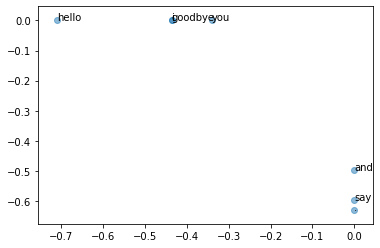

In [26]:
# 각 단어를 벡터로 표현 후 시각화

for i, j in word_to_id.items():
    plt.annotate(i,(U[j,0],U[j,1])) # 텍스트를 화살표와 함께 넣음
    
plt.scatter(U[:,0],U[:,1],alpha=0.5)
plt.show

# ※ PTB Data Set
- 펜 트리뱅크 데이터 셋
- 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용됨
- 각 문장을 하나의 큰 시계열 데이터로 취급
- eos : end of sentence

In [27]:
# PTB 데이터셋 import

import sys
sys.path.append(' .. ')
import numpy as np
import util as ut
import ptb # 책 github에서 ptb.py 파일 다운

In [28]:
# car, happy, lexus 에 해당하는 단어 인덱스 번호 확인 

corpus,word_to_id,id_to_word = ptb.load_data('train')

print(' 말뭉치 크기:',len(corpus))
print('corpus[:30]:',corpus[:30])
print()
print( 'id_to_word[0]:',id_to_word[0])
print( 'id_to_word[1]:',id_to_word[1])
print( 'id_to_word[2]:',id_to_word[2])
print()
print("word_to_id['car']:",word_to_id['car'])
print( "word_to_id['happy']:",word_to_id ['happy'])
print( "word_to_id['lexus']:",word_to_id ['lexus' ])

 말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [29]:
# PTB 데이터 셋 평가

window_size=2
wordvec_size=100

corpus,word_to_id,id_to_word=ptb.load_data('train')
vocab_size=len(word_to_id)
print('동시발생 수 계산...')

C=ut.create_co_matrix(corpus,vocab_size,window_size)
print('PPMI 계산...')

W=ut.ppmi(C,verbose=True)

동시발생 수 계산...
PPMI 계산...


C:\Users\user\Desktop\기타\practice\util.py:126: RuntimeWarning: overflow encountered in long_scalars
  pmi=np.log2(C[i,j]*N/(S[j]*S[i])+eps) # eps(매우 작은 수)를 더함으로써 log2가 0이 되는 것을 방지했다
C:\Users\user\Desktop\기타\practice\util.py:126: RuntimeWarning: invalid value encountered in log2
  pmi=np.log2(C[i,j]*N/(S[j]*S[i])+eps) # eps(매우 작은 수)를 더함으로써 log2가 0이 되는 것을 방지했다


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료


In [30]:
print('SVD 계산...')
try:
    # truncated SVD -> 빠름, 무작위 수를 사용함으로 매실행시 결과값이 다름
    from sklearn.utils.extmath import randomized_svd # 무작위수 사용, 특이값이 큰 것들만 계산
    U,S,V=randomized_svd(W,n_components=wordvec_size,n_iter=5,random_state=None)
    
except ImportError:
    # SVD -> 느림
    U,S,V=np.linalg.svd(W)

word_vecs=U[:,:wordvec_size]

querys=['you','year','car','toyota'] # 검색어
for i in querys:
    ut.most_similar(i,word_to_id,id_to_word,word_vecs,top=5)

SVD 계산...

[query]you
i: 0.6326202154159546
anybody: 0.594206690788269
we: 0.5703932642936707
do: 0.5488553047180176
've: 0.4863746762275696

[query]year
month: 0.6960796117782593
earlier: 0.6713275909423828
quarter: 0.6152653694152832
next: 0.610427737236023
last: 0.601426362991333

[query]car
luxury: 0.6880124807357788
auto: 0.6784319281578064
cars: 0.5845720767974854
corsica: 0.5556482076644897
truck: 0.5221288204193115

[query]toyota
motor: 0.718309760093689
motors: 0.6827175617218018
honda: 0.671058177947998
nissan: 0.63239985704422
lexus: 0.5844541192054749
